# 수업 내용
- 1. 효율적인 Fine-tuning (PEFT)의 원리 이해
- 2. PEFT의 큰 두축 - LoRA와 QLoRA
- 3. Unsloth Library 소개
- 4. Unsloth Library를 사용한 추론
- 5. Unsloth Library를 사용한 Fine-tuning (LoRA)


# 1. 효율적인 Fine-tuning (PEFT) 이란?

### Fine-tuning 개념 복습

- Fine-tuning 이라는 개념을 학습했습니다!
  - Foundation 모델에다가 추가 데이터를 넣어서 나만의 모델을 만드는 작업입니다!
  - 모델을 내 필요에 맞게 추가 학습시키는 것이죠.

- 잠깐 복습해볼까요?
- Fine-tuning의 종류
  - **Full Fine-tuning**
    - 전체 Layer의 파라미터를 업데이트 해요. 많은 비용이 들어가요.
    - 추가 학습이 잘 안되면, 모델 성능이 오히려 안좋아질수도 있습니다.
  - **Partial Fine-tuning**
    - 일부 Layer의 파라미터만 업데이트 해요.
    - 저번 수업 Linear Probing을 했어요.
      - 마지막 Layer만 파라미터 업데이트 했습니다.
      - 사진이 Ronald 인지, 아닌지 분류하는 모델로 파인튜닝했던 수업 기억나죠?

  - **효율적인 파인튜닝 (PEFT)** <--- **오늘 수업 내용**
    - 기존 학습된 파라미터를 거의 건드리지 않아요.
    - 기존 파라미터가 아닌, 새로운 파라미터를 추가하여 학습합니다.

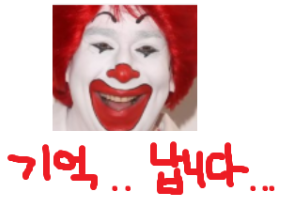

### PEFT! 효율적 파라미터 파인튜닝
- 이제는 모델의 규모가 너무 커져서, Full Fine-tuning을 하기 어렵습니다.
  - 그만한 데이터랑 GPU랑 시간이 없어요!
- 추가 학습도 적은 비용으로 할수 있는 방법이 필요했습니다.
- 아래와 같은 방법들이 생겼습니다.
    - **LoRA** (오늘 수업할 내용)    
    - Adapter-Tuning
    - Prompt-Tuning
    - 등등

- 위 방법들을 PEFT(Parameter-Efficient Fine-Tuning)라고 합니다.
  - 이름 그대로 **파인튜닝을 효율적으로 하자!** 라는 의미입니다
<br/>


### 학습 비용을 아끼는 또 하나의 방법 - 모델 크기를 줄이자!
- 모델 자체를 작게 만들면, 학습 비용도 내려갈것이 틀림이 없습니다.
  - **양자화** : 다 만들어진 모델을, 작게 축소하기 (오늘 수업할 내용)
  - Pruning : 가지치기, 불필요했던 파리미터를 찾아 제거하기
  - 등등

<br/>

- 대신 성능이 조금 낮아질 순 있겠죠.
  - 성능이 아주 조금만 낮아지고, 모델 크기가 많이 줄어든다면 의미가 있습니다!

# 2. PEFT의 큰 두축을 소개합니다. - LoRA와 QLoRA
- 효율적으로~ 파인튜닝을 하기 위한 두 방법을 소개합니다.
  - LoRA
    - 적은 량의 추가 학습으로 Full Fine-tuning 과 같은 효과 내기!!
    - 아이디어가 너무 좋아요!
  - QLoRA
    - 양자화를 해서 모델 자체를 작게만듭니다.
    - 이후에 LoRA를 합니다.

<br/>

- 한번 LoRA와 QLoRA 원리를 쉽게 이해해보겠습니다.

### LoRA 원리 이해하기 1단계 - Full Fine-tuning 생각해보기:

- Full Fine-tuning을 생각해보겠습니다.
  - 학습이 전 후 파라미터는 아래와 같이 될겁니다.
  - 파라미터 행렬이 원래 엄청 거대한 크기인데, 설명 편의상 3x3으로 표현했어요.

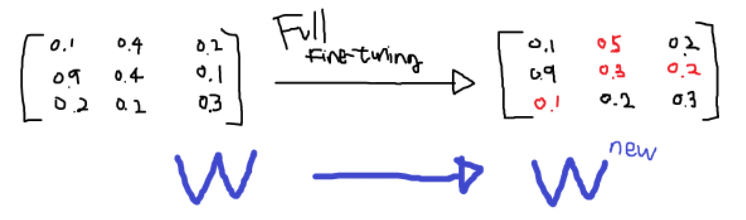

- 이걸 다음과 같이 표현할수도 있습니다.

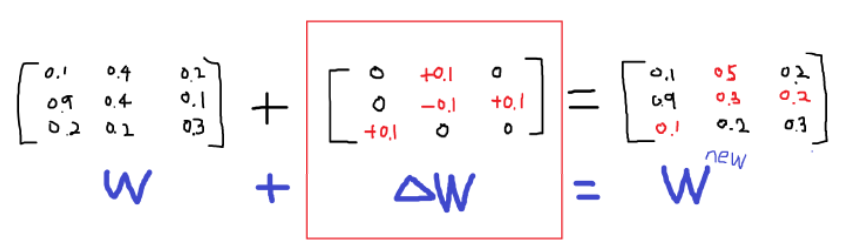

- 그럼 Full-Fine tuning은 결국 위에 빨간 사각형 영역의 delta W 값을 알아내는 작업입니다.

### LoRA 원리 이해하기 2단계 - 선형대수학의 행렬곱

- [3 x 1] 행렬과 [1 x 3] 행렬을 곱하면 [3 x 3] 행렬이 됩니다.

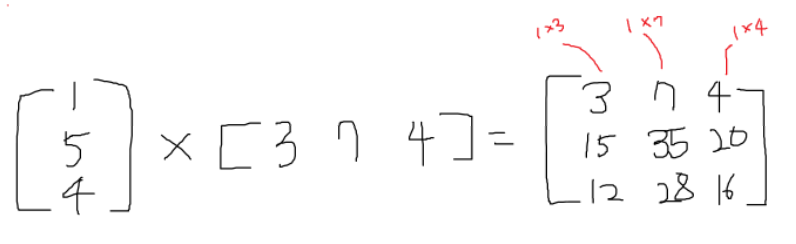

- 정리하자면 다음과 같습니다.
  - **[N x 1] 행렬과 [1 x N] 행렬의 곱으로 [N x N] 행렬을 만들 수 있다.**

### LoRA 원리 이해하기 3단계 - 행렬들의 합



- 한 행렬은 각각의 행렬들의 합으로 구성할 수 있습니다.

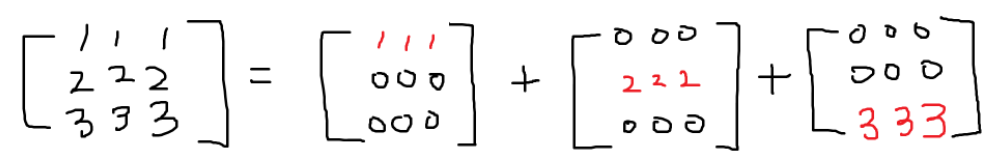

### LoRA 원리 이해하기 4단계 - delta W 구하기

- Full 파인튜닝할때 delta W를 구하는 것이죠?
- delta W는 **더 적은수의 파라미터의 연산**으로 근사값을 구할 수 있습니다.
  - 즉 delta W 의 모든 파라미터를 알아낼 필요가 없습니다.
  - delta W를 만들 수 있는 더 적은수의 파라미터를 알아내면 됩니다!
  - 이것이 LoRA의 원리입니다.

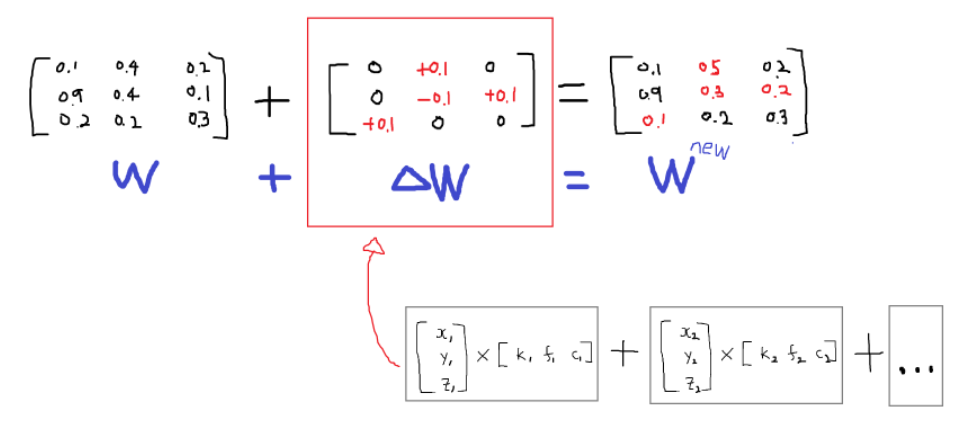

- 위 그림을보시면 delta W 를 어떻게 만들어내는지 확인할 수 있습니다.
  - [3 x 1] 행렬과 [1 x 3] 행렬의 곱을 합니다.
  - 이렇게 만들어진 행렬을 합쳐서 실제 delta W를 근사합니다.



- LoRA는 Full Fine-tuning 보다 알아내야할 (학습해야할) 파라미터 개수가 더 적습니다.
  - 만약 delta W 행렬이 10,000 x 10,000 사이즈라고 할 경우를 생각해보세요.
    - Full Fine tuning 에서 알아내야 할 파라미터 개수 = 1억개 입니다.
    - LoRA 로 Full Fine tuning과 비슷한 효과를 낼수 있는 파라미터 개수 = 100만개로도 가능합니다.
      - 더 많아질수록 delta W 랑 점점 더 근사한 값으로 됩니다.

<br/>

- LoRA를 쓰면, Full Fine-tuning의 delta W 값을 유사하게 만들 수 있습니다.

<br/>

- 아래 그림은 Full 파인튜닝과 LoRA와 원리를 하나의 그림으로 정리한 겁니다.
  - 아래 그림에서 A, B는 설명에서 [3 x 1], [1 x 3] 행렬을 의미합니다.

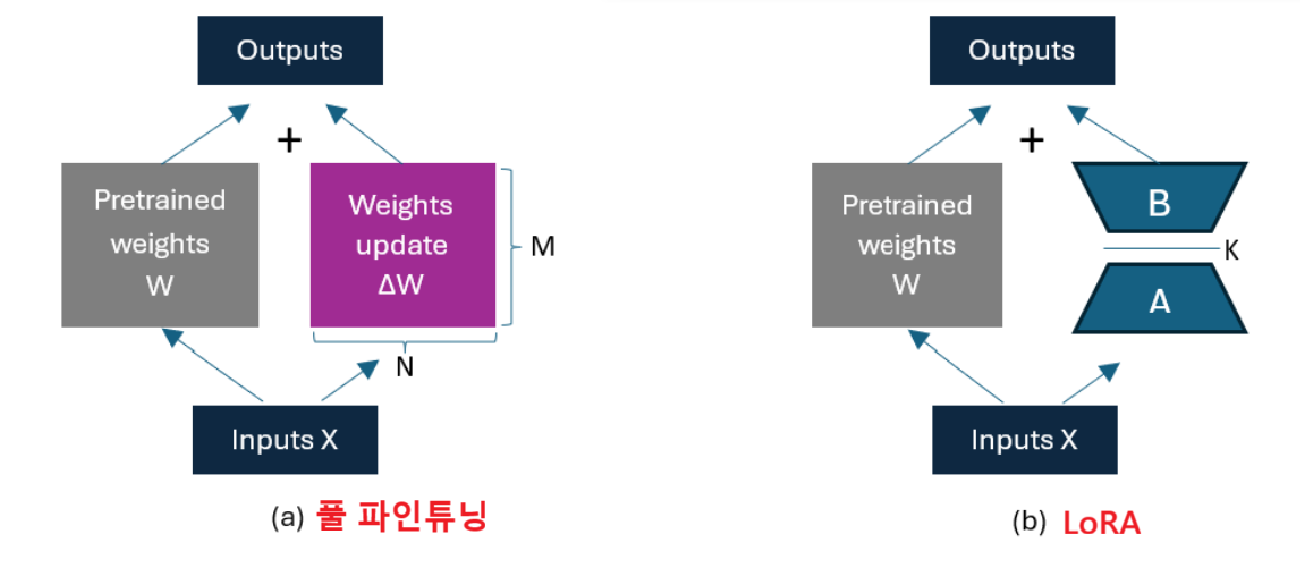

### QLoRA 이해하기 1 단계 - 양자화 이해하기
- 5자리수의 곱을 계산하는 것 보다는.. 2자리 곱을 계산하는게 훨씬 빠를겁니다.
  - 연산속도도 그렇고, 저장 공간도 그렇구요.
- AI 연산들은 기본적으로 16 bit 로 소수점(실수)를 표현하고, 계산합니다.
- 양자화란 16 bit보다 더 작은 bit를 사용해서 연산하고, 값을 저장하는 것을 뜻합니다.

<br/>


- 0.0 ~ 1.0 범위를 균등하게 나누어 표현하는 경우..<br/>
bit 수에 따른 실수 표현 step은 다음과 같을 수 있습니다. <br/>
(AI에서는 BF16, FP16이라는 다른 실수 표현 방법을 쓰긴 하지만, 표현 범위의 차이를 이해하기 위함입니다.)
  
  - 2 bit : 0.3333
  - 3 bit : 0.1429
  - 4 bit : 0.0667
  - 5 bit : 0.03226
  - 8 bit : 0.00392
  - 16 bit : 0.00001526

<br/>

- 위 경우 2 bit로는 실수를 이렇게 밖에 표현 못해요.
  - 0.3333 / 0.6666 / 0.9999 끝
  - 표현 범위가 작습니다.

<br/>

- 그래서 16 bit로 저장된 값들을 4 bit 근사치로 바꾸면, 성능이 낮아지겠죠?
  - 대신 4 bit 실수를 취급하는 모델로 변경하면, 추론 속도, 파인튜닝 속도 등이 빨라질겁니다.
  - 모든 파라미터를 4 bit로 바꾸는 건 아니고, 연산에 중요한 부분은 16 bit 그대로 사용합니다.

### QLoRA 이해하기 2 단계 - QLoRA 란?

- QLoRA의 개념은 간단합니다!
  - Quantized Low-Rank Adaptation : 양자화된 모델에 LoRA 적용
  - 16 bit로 된 모델을 4 bit로 양자화를 합니다.
  - 이후에 LoRA를 하면 됩니다.

<br/>

- 우리 수업에서는 양자화 실습은 하지 않습니다!
  - 허깅페이스에서 양자화가 이미 된 4bit 모델을 가져다 쓸겁니다.
  - 바로 LoRA만 하면 됩니다.



### [중요] LoRA, QLoRA 가 가진 의미
- LoRA와 QLoRA는 대형 모델.. Foundation Model의 파인튜닝을 **대중화** 시켰습니다.
- 집에서 사용하는 PC용 그래픽카드로도 Foundation Model 학습이 가능해졌습니다.

# 3. Unsloth Library 소개

- Unsloth Library는 저성능, 적은 개수의 GPU로 파인튜닝을 가능하도록 만든 Library 입니다.
  - 허깅페이스 Transformer Library 처럼 추론도 가능합니다.
  - 허깅페이스 Transformer Library 쓰는 것 보다 LoRA 학습 효율이 더 좋다고 합니다.
    - (공식홈페이지 설명에 따르면)
    - **2배 이상 학습속도가 빠름**
    - **70% 이상 GPU 메모리 사용량이 줄어듬**
  - 비교 대상은 허깅페이스의 Flash Attention 2 가속화 옵션 대비입니다.
    - 그런데 구글 코랩의 T4 GPU에서는 Flash Attention 2 가속화 옵션도 못쓰거든요. (유로 GPU만 사용 가능)
    - 그래서 코랩 사용자한테는 Unsloth의 의미가 더더욱 커요.

<br/>

- 앞으로 코랩에서 파인튜닝은 항상 LoRA를 하고, Unsloth Library로 합시다 ㅎㅎ

# 4. Unsloth로 추론하기
- Unsloth로 모델을 추론해보며, Unsloth Library에 친숙해집시다.

### 추론에 사용할 모델 소개 : Gemma3n

- 추론에 사용할 모델은 Google의 초 경량 멀티모달 모델인 Gemma3n (잼마3n) 입니다.
  - 2025년 6월에 출시된 임베디드용 경량 모델입니다.
    - 텍스트, 이미지, 오디오, 동영상 입력 됩니다.
    - 참고 : https://developers.googleblog.com/ko/introducing-gemma-3n/

  - 두 가지 모델을 제공합니다.
    - E2B : 2B 수준으로 동작 가능한 모델입니다. **속도**를 중요시합니다.
    - E4B : 4B 수준으로 동작 가능한 모델입니다. **성능**을 중요시합니다.

  - 모델 시연 영상한번 보고 하시죠.
    - 아래 유튜브 링크를 누르시면 2:10 초 부분인 시연 영상이 Play 됩니다.
    - https://youtu.be/eJFJRyXEHZ0?t=128


### 환경세팅

- T4 GPU를 켭니다.

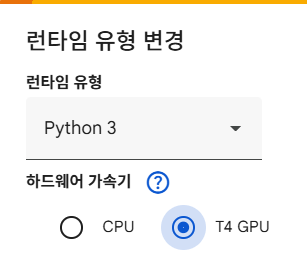

### 설치하기
- 해당 내용은 Unsloth 공식 Document 내용을 참고하였습니다.
  - Unsloth는 Document가 잘 되어있어요.
  - Library 사용 가이드에 따라 실행해주세요~.

In [ ]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Colab은 아래 코드가 수행됩니다.
    import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2
import torch; torch._dynamo.config.recompile_limit = 64;


In [ ]:
%%capture
!pip install --no-deps --upgrade timm # Only for Gemma 3N

### 모델 로딩 (다운로드)
- FastModel 이라는 클래스를 사용합니다.
- 모델 로딩, 추론, 파인튜닝을 할 때 사용합니다.

<br/>

- 원래 Gemma3N의 주소는 다음과 같습니다.
  - https://huggingface.co/google/gemma-3n-E2B-it
  - 허깅페이스 KEY 를 넣어야 사용가능합니다.
- 그런데 unsloth이 직접 업로드한 모델은 허깅페이스 KEY 없어도 됩니다.
- 양자화된 모델도 제공합니다.
  - unsloth/gemma-3n-E4B-it : E4B는 T4 GPU로 안돌아가요.
  - unsloth/gemma-3n-E2B-it : 옵션 세팅 잘하면 아슬아슬하게 돌아가요.
  - **unsloth/gemma-3n-E2B-it-unsloth-bnb-4bit** : Unsloth에서 4비트 양자화한 모델 입니다.



In [ ]:
from unsloth import FastModel
import torch

model, tokenizer = FastModel.from_pretrained(
    model_name = "unsloth/gemma-3n-E2B-it-unsloth-bnb-4bit", # 허깅페이스 모델 이름
    dtype = None, # None 을 하면 자동으로 데이터 타입을 인식합니다.
    max_seq_length = 2048, # 모델이 한번에 인식할 수 있는 최대 토큰 길이
    load_in_4bit = True,  # 4 bit 양자화 옵션 True (메모리 절약)
    full_finetuning = False, # Full Finetuning 안함
)

### 추론 함수
- do_gemma_3n_inference 함수를 하나 만듭니다.

In [ ]:
from transformers import TextStreamer
# Helper function for inference
def do_gemma_3n_inference(messages, max_new_tokens = 128):
    _ = model.generate(
        **tokenizer.apply_chat_template(
            messages,
            add_generation_prompt = True, # Must add for generation
            tokenize = True,
            return_dict = True,
            return_tensors = "pt",
        ).to("cuda"),
        max_new_tokens = max_new_tokens,
        temperature = 1.0, top_p = 0.95, top_k = 64,
        streamer = TextStreamer(tokenizer, skip_prompt = True),
    )

### 이미지 추론하기

- 아래 이미지와 함께 Text를 주고 추론을 시켜봅니다.
  - 이 동물은 어떤 영화에 출현했니?

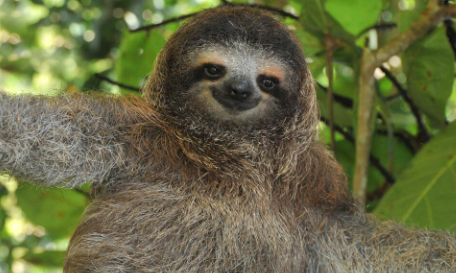

In [ ]:
sloth_link = "https://files.worldwildlife.org/wwfcmsprod/images/Sloth_Sitting_iStock_3_12_2014/story_full_width/8l7pbjmj29_iStock_000011145477Large_mini__1_.jpg"

messages = [{
    "role" : "user",
    "content": [
        { "type": "image", "image" : sloth_link },
        { "type": "text",  "text" : "이 동물은 어떤 영화 나오니?" }
    ]
}]

# 처음에는 3분 정도 소요됩니다.
do_gemma_3n_inference(messages, max_new_tokens = 256)

이 동물은 **바나나 킥 (Banana Kick)**이라는 영화에 등장했습니다. 

바나나 킥은 1997년 개봉한 코미디 영화로, 슬로스(sloth)를 소재로 한 유머러스한 내용입니다. 영화 속에서 슬로스는 주인공의 친구로 등장하며, 그의 엉뚱하고 느린 행동으로 많은 웃음을 선사했습니다. 

혹시 이 영화를 보셨거나 슬로스에 대해 알고 싶으시면 언제든지 다시 질문해주세요!<end_of_turn>


### 삼행시를 시켜봅니다.

- 삼행시를 시켜봅시다.

In [ ]:
messages = [{
    "role": "user",
    "content": [{ "type" : "text",
                  "text" : "3행시를 지어줘, 날 웃겨야해:\n\n맥도날드" }]
}]
do_gemma_3n_inference(messages)

### 소리도 들을 수 있습니다.
- 아래는 음성파일입니다.
  - 우리는 달에 가기로 했습니다. (by 미국 존 F. 케네디 대통령)

In [ ]:
from IPython.display import Audio, display
Audio("https://www.nasa.gov/wp-content/uploads/2015/01/591240main_JFKmoonspeech.mp3")

- 위 음성파일을 Model에게 주고, 물어봅시다.

In [ ]:
# 음성파일 다운로드
!wget -q https://www.nasa.gov/wp-content/uploads/2015/01/591240main_JFKmoonspeech.mp3 -O audio.mp3

In [ ]:
audio_file = "audio.mp3"

messages = [{
    "role" : "user",
    "content": [
        { "type": "audio", "audio" : audio_file },
        { "type": "text",  "text" : "어떤 오디오야?" }
    ]
}]
do_gemma_3n_inference(messages, max_new_tokens = 256)

이것은 영어로 된 발췌문입니다. "I believe that this nation should commit itself to achieving the goal before this decade is out of landing a man on the moon and returning him safely to the earth."

이 발췌문은 1960년대에 미국이 달에 인간을 착륙시키는 것을 목표로 했던 존 F. 케네디 대통령의 유명한 연설의 일부입니다.<end_of_turn>


# 5. Unsloth로 파인튜닝(PEFT) - 제주도 사투리 번역기 만들기

이번 실습에서는 LLM이 **표준어를 제주도 사투리로 번역**하도록 학습시켜 보겠습니다.

### 5-1. 파인튜닝에 사용할 모델 소개 : Qwen3

- 모델마다 한국어 파인튜닝이 잘되는 모델이 있고, 아닌 모델이 있습니다.
  - Gemma3n 실험결과, 권장 하이퍼파라미터로는 한글 파인튜닝이 잘 안되었습니다.
  - 한국어를 위한 좋은 하이퍼파라미터가 있으면 잘 될수도 있겠죠?
- 이번 시간에는 Qwen3을 이용하여 LoRA 파인튜닝을 해보겠습니다.
  - 파인튜닝을 위해, 컴퓨터 재부팅 후 맑은 정신으로 진행해봅시다.
  - Runtime을 새로 연결해주세요. 이는 컴퓨터 재부팅에 비유할수 있어요.
  - 필요한 Library를 처음부터 다시 설치할겁니다.

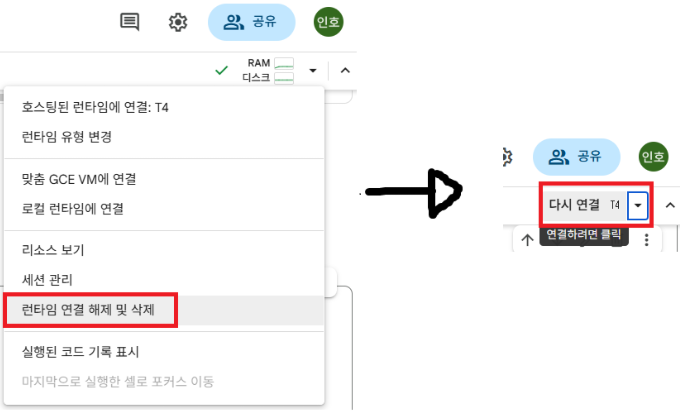

### 5-1. 필수 Library 설치하기
- 다음 코드는 Unsloth 공식 Document 내용을 그대로 사용했습니다.

In [ ]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
   # Colab은 아래 코드가 수행됩니다.
    import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2

### 5-2. Model 로드 / 추론해보기
- Qwen3 모델을 허깅페이스에서 다운로드 및 로드합니다.
- unsloth에서 4bit 양자화 한 모델을 사용합니다.

In [ ]:
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen3-4B-Instruct-2507",
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    load_in_8bit = False, # [NEW!] A bit more accurate, uses 2x memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
)

/tmp/ipython-input-1327791964.py:1: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  from unsloth import FastLanguageModel


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.10.7: Fast Qwen3 patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

- 모델 추론을 담당하는 함수를 하나 만듭니다.

In [ ]:
from transformers import TextStreamer
# Helper function for inference
def do_qwen3_inference(messages, max_new_tokens = 128):
    _ = model.generate(
        **tokenizer.apply_chat_template(
            messages,
            add_generation_prompt = True, # Must add for generation
            tokenize = True,
            return_dict = True,
            return_tensors = "pt",
        ).to("cuda"),
        max_new_tokens = max_new_tokens,
        temperature = 1.2, top_p = 0.9, top_k = 50,
        streamer = TextStreamer(tokenizer, skip_prompt = True),
    )

- 파인튜닝 하기 전, 제주도 사투리를 이해하는지 테스트해봅시다.
  - 잘 모르는 것 같습니다.

In [ ]:
messages = [{
    "role": "user",
    "content": "다음 문장을 제주도 사투리로 번역해줘:\n\n귤 먹으면서 바다에서 놀면 좋아요!"
}]

do_qwen3_inference(messages)

귤 먹으면 바다에 놀아요!<|im_end|>


### 5-3. LoRA 어댑터 추가하기
- LoRA 어댑터를 추가합니다.
- 이 어댑터에 있는 소량의 파라미터만 학습할 예정입니다!
- 이 어댑터의 Output 은 원래 가중치(W)에 더해질 가중치 값입니다. (delta W를 근사하는 A, B들)

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 32, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 32,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2025.10.7 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


### 5-4. 모델의 입력 포맷 확인하기
- 모델마다 사용하는 포맷이 있습니다.
  - Qwen이 사전학습될때 사용했되었던... 모델 고유의 포맷입니다.
  - 따라서 추가 학습할때도, 이 포맷에 맞추어 데이터를 넣어줘야합니다.

- 이렇게 언어마다 사용하는 포맷을 "**chat template**" 이라고 합니다.

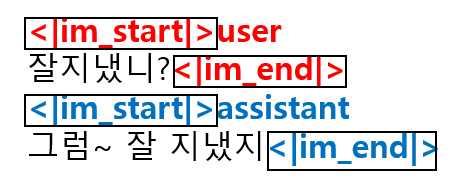

### 5-5. Dataset 준비하기
- 파인튜닝에 사용할 "제주도 사투리 번역" 데이터셋을 먼저 살펴보겠습니다
  - https://huggingface.co/datasets/junyeong-nero/jeju-dialect-to-standard
- Data Studio를 클릭하면, 데이터셋을 확인할 수 있습니다.

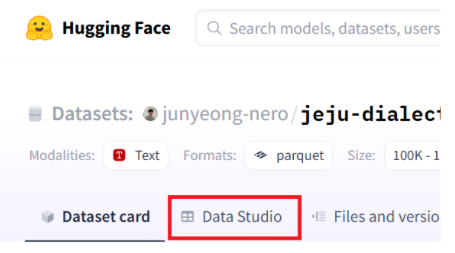

- 이 데이터셋은 2개의 컬럼으로 구성되어있습니다.
  - "standard" : 표준어
  - "dialect" : 사투리

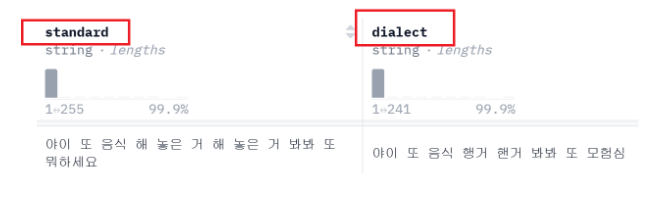

- 데이터 셋을 로드합시다.

In [ ]:
from datasets import load_dataset

# 허깅페이스 허브에서 제주도 사투리 데이터셋을 불러옵니다.
# 전체 데이터(453k)는 양이 많으므로, 데모를 위해 10,000개만 사용합니다.
dataset_origin = load_dataset("junyeong-nero/jeju-dialect-to-standard" , split = "train[:10000]")

In [ ]:
print(dataset_origin[100]['standard']) # 100번째 데이터
print('-------------')
print(dataset_origin[100]['dialect'])


 미지근따뜻
-------------
 맨도롱또똣


### 5-6. Chat Template에 맞춰 포맷 변경하기
- Chat Template으로 바꾸려면 다음 순서로 바꾸는 것을 가이드하고 있습니다.
- 이는 유지보수의 편의성 위한 허깅페이스의 권장 가이드입니다!

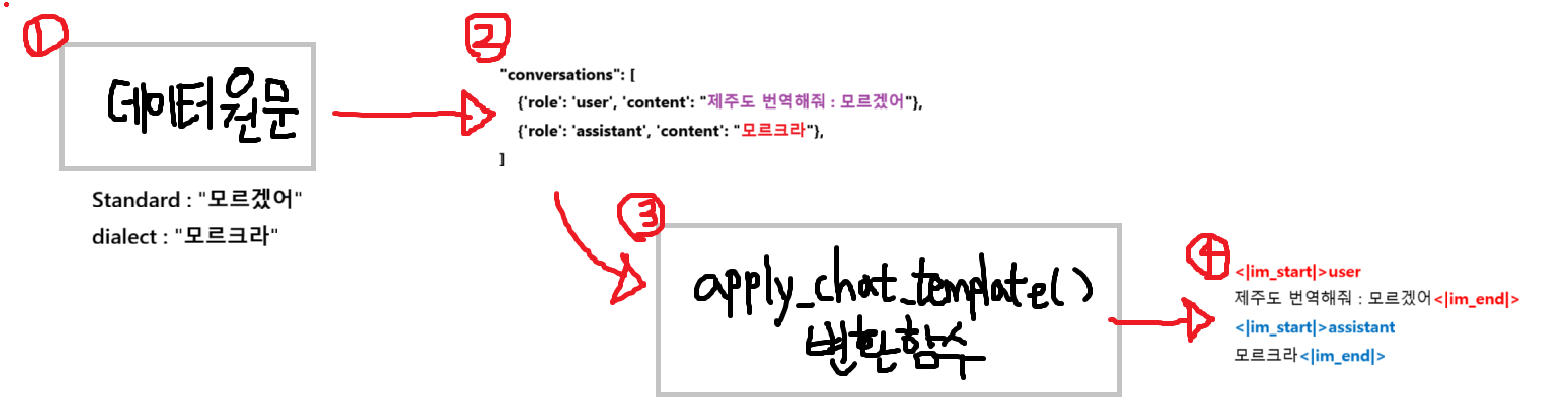

In [ ]:
# 원본 데이터는 'standard', 'dialect' 컬럼으로 구성되어 있습니다.
# 이것을 Gemma의 대화 형식에 맞게 변환하는 함수를 정의합니다.
def format_jeju_data(example):
    return {
        "conversations": [
            {'role': 'user', 'content': f"다음 문장을 제주도 사투리로 번역해줘:\n\n{example['standard']}"},
            {'role': 'assistant', 'content': example['dialect']},
        ]
    }

# map 함수를 사용해 데이터셋 전체에 함수를 적용합니다.
dataset = dataset_origin.map(format_jeju_data, remove_columns=list(dataset_origin.features))

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

- 변환이 잘 되었는지 출력해봅시다.

In [ ]:
dataset[100]['conversations']

[{'content': '다음 문장을 제주도 사투리로 번역해줘:\n\n 미지근따뜻', 'role': 'user'},
 {'content': ' 맨도롱또똣', 'role': 'assistant'}]

- 이제 apply_chat_template() 를 거치면, 모델이 원하는 포맷이 완성됩니다.
  - qwen3용 chat template 객체를 먼저 생성합니다.
  - 이후 apply_chat_template()을 이용하여 최종 포맷으로 변경합니다.


In [ ]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "qwen3-instruct",
)

In [ ]:
def formatting_prompts_func(examples):
   convos = examples["conversations"]
   texts = [tokenizer.apply_chat_template(convo, tokenize = False, add_generation_prompt = False) for convo in convos]
   return { "text" : texts, }

dataset = dataset.map(formatting_prompts_func, batched = True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

- 완성된 포맷을 확인해봅시다.

In [ ]:
dataset[100]['text']

'<|im_start|>user\n다음 문장을 제주도 사투리로 번역해줘:\n\n 미지근따뜻<|im_end|>\n<|im_start|>assistant\n 맨도롱또똣<|im_end|>\n'

### 5-7. 모델 학습 준비
- 이제 학습을 진행할 '트레이너(Trainer)'를 설정합니다.
- 트레이너는 모델, 토크나이저, 데이터셋을 받아 학습 과정을 총괄하는 감독관과 같습니다.
  - 이곳에서 하이퍼파라미터들을 세팅합니다.

In [ ]:
from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    eval_dataset = None, # Can set up evaluation!
    args = SFTConfig(
        dataset_text_field = "text",
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4, # Use GA to mimic batch size!
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4, # Reduce to 2e-5 for long training runs
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none", # Use TrackIO/WandB etc
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/10000 [00:00<?, ? examples/s]

### 5-8. 명령과 답변 구분해주기
- 모델은 "질문"을 생성해야 하는 것이아니라, "답변" 부분만 예측하여 문장을 생성해야합니다.
- 아래는 모델이 예측해야할 "답변" 부분이 어딘지지 알려주는 코드입니다

In [ ]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<|im_start|>user\n",
    response_part = "<|im_start|>assistant\n",
)

Map (num_proc=6):   0%|          | 0/10000 [00:00<?, ? examples/s]

### 5-9. 학습 시작!
- Loss가 줄어드는 모습을 확인할 수 있습니다.
- Loss가 전반적으로 줄어들지 않으면 학습이 안되고 있는 것입니다

In [ ]:
trainer_stats = trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None}.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 10,000 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 66,060,288 of 4,088,528,384 (1.62% trained)


Step,Training Loss
1,2.216700
2,3.427600
3,2.478100
4,1.599900
5,1.579500
6,1.709200
7,1.685000
8,2.164200
9,2.220100
10,1.457200


### 5-10. 파인튜닝된 모델 테스트하기

- 학습이 끝난 모델이 얼마나 똑똑해졌는지 테스트해볼 시간입니다.

In [ ]:
messages = [
    {"role" : "user", "content" : "다음 문장을 제주도 사투리로 번역해줘:\n\n 귤 먹으면서 바다에서 놀면 좋아요!"}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize = False,
    add_generation_prompt = True, # Must add for generation
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer(text, return_tensors = "pt").to("cuda"),
    max_new_tokens = 1000, # Increase for longer outputs!
    temperature = 1.4, top_p = 0.9, top_k = 20, # For non thinking
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

 귤 음수다마시엔 놀면 좋아주다!<|im_end|>


### 5-11. 모델 저장하기

힘들게 학습시킨 모델을 저장해서 나중에 다시 사용하거나 다른 사람과 공유할 수 있습니다.

- **LoRA 어댑터만 저장 (권장)**: 가장 가볍고 효율적인 방법입니다. 나중에 베이스 모델 위에 이 어댑터를 얹어서 사용하면 됩니다.
- **모델 병합(Merge) 후 저장**: 베이스 모델과 LoRA 어댑터를 합쳐서 하나의 완전한 모델로 저장합니다. 파일 크기는 커지지만, 다른 환경에서 베이스 모델 없이 단독으로 사용하기 편리합니다.

In [ ]:
# LoRA 어댑터만 저장합니다. (파일 크기가 매우 작습니다)
model.save_pretrained("gemma_jeju_lora")
tokenizer.save_pretrained("gemma_jeju_lora")

print("LoRA 어댑터가 'gemma_jeju_lora' 폴더에 저장되었습니다.")

# (선택) 모델을 병합하여 저장합니다. 시간이 조금 걸릴 수 있습니다.
if False: # 필요할 때 True로 바꿔서 실행하세요.
    merged_model = model.merge_and_unload() # 베이스 모델과 LoRA 어댑터 병합
    merged_model.save_pretrained("gemma_jeju_merged") # 병합된 모델 저장
    tokenizer.save_pretrained("gemma_jeju_merged")
    print("병합된 모델이 'gemma_jeju_merged' 폴더에 저장되었습니다.")

# 6. 끝으로
  - Unsloth Library를 이용하여 추론과 파인튜닝을 했습니다.
  - 멀티모달 모델도 위와 같은 방법으로 추론, 파인튜닝을 할 수 있습니다.
    - 필요시 공식 Document가 굉장히 잘 나와있으니 참고하세요.
  - 파인튜닝은 많은 실험을 통해 좋은 결과를 얻을 수 있습니다.
    - 하이퍼파라미터 값을 무엇으로 할지,
    - 데이터셋이 부족한지, 퀄리티가 낮은지 고민하고,
    - 코드가 잘못된 부분이 있는지 고민하고,
    - 잘 될때까지 고민해야되는 것이 파인튜닝입니다.
  
<br/>

### Easy 자료 (강사님 자료)
- AI를 처음 공부하는 분들을 위해 만들어져있습니다.
- 내용을 모두 이해해야합니다! **강사님의 도움을 적극적으로 받아주세요.**

### 실습 / 과제 자료 (업스테이지 자료)
- AI를 공부해본 경험자 위주로 만들어져있습니다.
- 퍼즐조각을 모은다는 생각으로 공부해주세요!. **GPT의 도움을 적극적으로 받아주세요.**

### 교수님 강의
- 국내 최고의 AI 교수님들의 강의가 시작됩니다.
- 최대한 내용을 이해해봅시다.
  